# Analyze the correlation between epigenetic features and single cell StemNet
Since the trained statistical models did not meet our expectatoins regarding establishing a meaningful association between the epigenetic features and gene expression, we decided to take a deeper look at the link(s) between these two quantities.

## Red the data

In [1]:
x <- read.csv("../scMTL_StemNet_imputed_epigenetic_feature_doubleReduced.txt")
y <- read.csv("../scMTL_StemNet_imputed_epigenetic_response_doubleReduced.txt")

In [2]:
rownames(x) <- x$X
x <- x[, -1]

rownames(y) <- y$X
y <- y[, -1]

In [3]:
print(dim(x))
print(dim(y))

[1] 9593  704
[1] 14142   238


## Print the range of data
The features data are log-transformed before-hand when dumped into the RData file.

In [4]:
print(range(x))
print(range(y))

[1]    0.000 4833.416
[1]      0.0 300753.8


## Find the overlapping genes (full)

In [5]:
data <- merge(x, y, by= "row.names")

In [6]:
rownames(data) <- data$Row.names
data <- data[, -1]

In [7]:
dim(data)

[1] 5297  942

## Adjust the data variables based on the overlapping genes found above
split the merged dataset into the x and y variables

In [8]:
x <- data[, seq(ncol(x))]
y <- data[, seq(1 + ncol(x), ncol(data))]

In [9]:
all.equal(rownames(x), rownames(y))

[1] TRUE

In [10]:
dim(x)
dim(y)

[1] 5297  704

[1] 5297  238

In [11]:
x[1:5, 1:5]

y[1:5, 1:5]

,AHR..ARNT,DDIT3..CEBPA,MAX..MYC,PPARG..RXRA,RXRA..VDR
ENSG00000000003,5.448157e-04,7.009042e-04,6.914483e-05,1.712696e-04,5.410757e-05
ENSG00000000005,2.191789e-04,1.072164e-04,9.835010e-06,4.677776e-05,2.300385e-06
ENSG00000000419,3.467800e-03,2.258417e-03,5.191246e-05,3.407326e-04,2.535158e-06
ENSG00000000457,4.477380e-04,5.608305e-05,1.011268e-05,4.199648e-03,3.371861e-06
ENSG00000000971,1.762576e-05,1.782494e-07,7.549618e-08,6.666630e-08,1.240023e-08


,HLC_CEL_c11_R1,HLC_CEL_c17_R1,HLC_CEL_c25_R1,HLC_CEL_c35_R1,HLC_CEL_c41_R1
ENSG00000000003,187.0059603,51.45814120,128.641115,181.698552,70.8065863
ENSG00000000005,0.1775571,0.03944102,0.000000,0.000000,0.0000000
ENSG00000000419,222.6304539,343.27904094,38.918024,366.993467,83.3195942
ENSG00000000457,0.2768822,4.15153579,1.052317,8.649976,13.3292322
ENSG00000000971,1.4366468,0.48921153,8.371780,6.724955,0.3790762


## Log-transform the response data

In [12]:
y <- log2(1 + y)

In [13]:
print(range(y))

[1]  0.00000 18.19823


## Compute the correlation between each feature and each response vector (gene expression profile per cell)

In [14]:
cors <- list()
for(i in seq(ncol(y)))
    cors[[i]] <- sapply(seq(ncol(x)), function(j)cor(x[, j], y[, i]))

## Print the range of the resulting correlation values for each cell

In [15]:
df <- data.frame(min= as.numeric(lapply(cors, FUN= min)), max= as.numeric(lapply(cors, FUN= max)))
rownames(df) <- colnames(y)
df[seq(20), ]

,min,max
HLC_CEL_c11_R1,-0.02637056,0.1699565
HLC_CEL_c17_R1,-0.02927411,0.1538812
HLC_CEL_c25_R1,-0.02332417,0.1804742
HLC_CEL_c35_R1,-0.02538996,0.1706861
HLC_CEL_c41_R1,-0.02790027,0.1682209
HLC_CEL_c42_R1,-0.02477844,0.1852245
HLC_CEL_c43_R1,-0.02374254,0.1721299
HLC_CEL_c47_R1,-0.02693532,0.1717021
HLC_CEL_c49_R1,-0.02064682,0.1634317
HLC_CEL_c5_R1,-0.03693443,0.1854805


## Plot histogram to have a more concise view of the correlation distributions

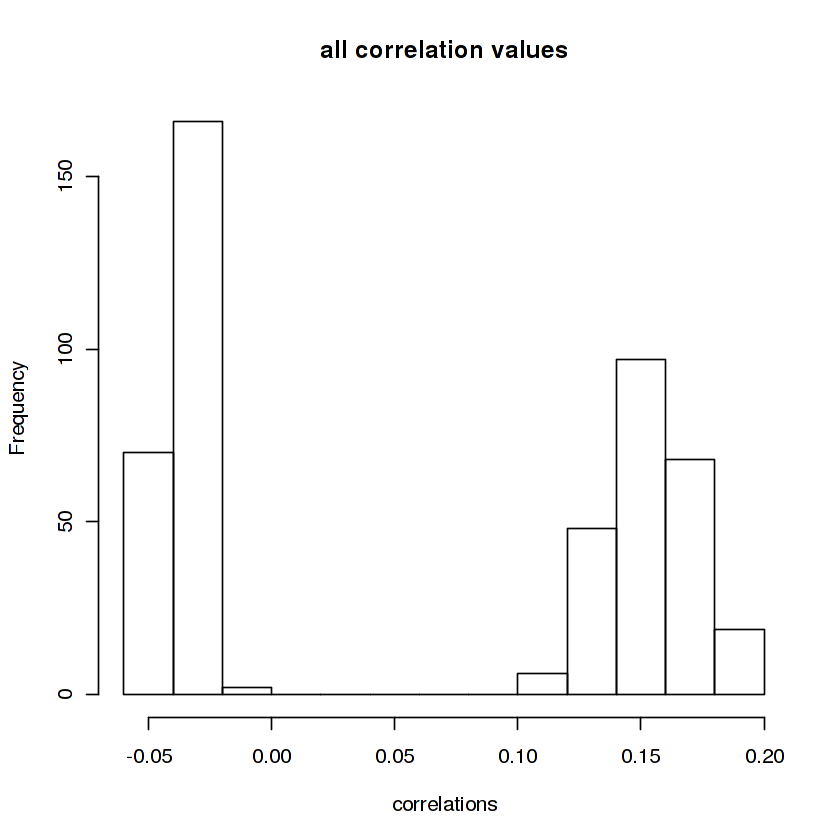

In [16]:
hist(as.matrix(df), main= "all correlation values", xlab= "correlations")